# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

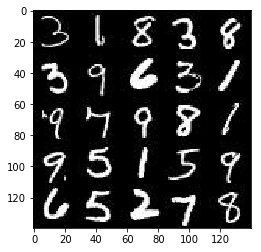

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

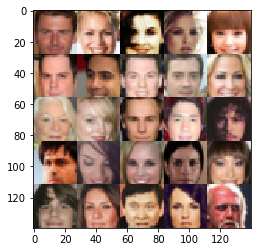

In [3]:
show_n_images = 25

"""

DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0


/home/aizazsharif/anaconda3/envs/tensorflow-new/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """

        # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels))
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32, shape=())

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False,alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer 1
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        lrelu1 = tf.maximum(alpha * h1, h1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(h2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding="SAME", 
                             kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(h3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        #Flatten
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True,alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # OK: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # Ffully connected layer
        h1 = tf.layers.dense(z, 7*7*256)
        
        # Reshape 
        h1 = tf.reshape(h1, (-1, 7, 7, 256))
        bn1 = tf.layers.batch_normalization(h1, training=is_train)
        lrelu1 = tf.maximum(alpha * bn1, bn1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d_transpose(lrelu1, 128, 5, strides=1, padding="SAME")
        bn2 = tf.layers.batch_normalization(h2, training=is_train)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
       
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d_transpose(lrelu2, 64, 5, strides=2, padding='SAME')
        bn3 = tf.layers.batch_normalization(h3, training=is_train)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
       
        
        # Output layer, 28x28x5
        logits = tf.layers.conv2d_transpose(lrelu3, out_channel_dim, 5, strides=2, padding="SAME")
        
        out = tf.tanh(logits)
       
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
   
   # OK: Implement Function
    smooth = 0.1
    
    # Generator  
    g_model = generator(input_z, out_channel_dim, is_train=True)

    # Disriminator 
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    # Calculate loss
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
     labels=tf.ones_like(d_logits_real) * (1 - smooth)))

    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
     labels=tf.zeros_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                    labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
     # Set the image dimensions
    _, image_width, image_height, image_channels = data_shape
    
    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    
    # Implement model_loss to set the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    # Implement model_opt to set d_train_opt and g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    # Batch counter
    batch_count = 0
    
    # Number of images to print
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # Multiply batch_images by 2.0 since the dataset ranges from -0.5 to 0.5
                batch_images = batch_images*2.0
                
                # Random noise for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # Increment the batch count
                batch_count += 1

                # Print the d_train_loss and g_train_loss every 10 batches
                if (batch_count % 10 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))   
                    
                # Print the generator output every 100 batches
                if (batch_count % 100 == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.5541... Generator Loss: 1.5298
Epoch 1/2... Discriminator Loss: 3.7593... Generator Loss: 1.7851
Epoch 1/2... Discriminator Loss: 5.9830... Generator Loss: 1.1886
Epoch 1/2... Discriminator Loss: 0.7923... Generator Loss: 9.1459
Epoch 1/2... Discriminator Loss: 10.2772... Generator Loss: 31.5619
Epoch 1/2... Discriminator Loss: 10.9576... Generator Loss: 15.1061
Epoch 1/2... Discriminator Loss: 1.3147... Generator Loss: 6.0824
Epoch 1/2... Discriminator Loss: 1.8371... Generator Loss: 0.8621
Epoch 1/2... Discriminator Loss: 0.6895... Generator Loss: 3.2355
Epoch 1/2... Discriminator Loss: 0.6449... Generator Loss: 2.2943


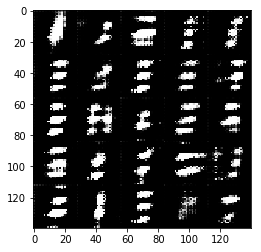

Epoch 1/2... Discriminator Loss: 2.4024... Generator Loss: 0.3222
Epoch 1/2... Discriminator Loss: 1.6436... Generator Loss: 2.6968
Epoch 1/2... Discriminator Loss: 1.5178... Generator Loss: 1.4104
Epoch 1/2... Discriminator Loss: 2.4363... Generator Loss: 5.3648
Epoch 1/2... Discriminator Loss: 2.0046... Generator Loss: 0.5333
Epoch 1/2... Discriminator Loss: 1.7964... Generator Loss: 0.8270
Epoch 1/2... Discriminator Loss: 2.1474... Generator Loss: 3.5308
Epoch 1/2... Discriminator Loss: 0.8387... Generator Loss: 2.8147
Epoch 1/2... Discriminator Loss: 1.0005... Generator Loss: 2.7171
Epoch 1/2... Discriminator Loss: 0.9008... Generator Loss: 2.3685


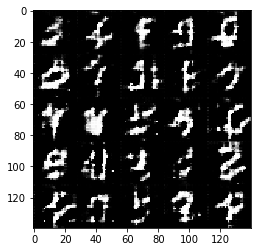

Epoch 1/2... Discriminator Loss: 0.7476... Generator Loss: 3.1118
Epoch 1/2... Discriminator Loss: 0.7087... Generator Loss: 1.9596
Epoch 1/2... Discriminator Loss: 1.7175... Generator Loss: 3.1854
Epoch 1/2... Discriminator Loss: 1.5577... Generator Loss: 0.5888
Epoch 1/2... Discriminator Loss: 1.9844... Generator Loss: 0.3966
Epoch 1/2... Discriminator Loss: 1.0255... Generator Loss: 0.9826
Epoch 1/2... Discriminator Loss: 1.5279... Generator Loss: 1.5354
Epoch 1/2... Discriminator Loss: 1.5202... Generator Loss: 2.0433
Epoch 1/2... Discriminator Loss: 1.5963... Generator Loss: 1.1095
Epoch 1/2... Discriminator Loss: 1.1576... Generator Loss: 1.4759


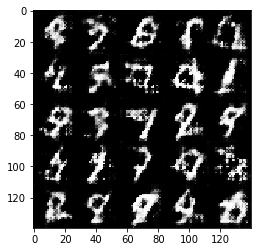

Epoch 1/2... Discriminator Loss: 1.6884... Generator Loss: 0.6819
Epoch 1/2... Discriminator Loss: 1.1145... Generator Loss: 1.4253
Epoch 1/2... Discriminator Loss: 1.2672... Generator Loss: 2.2219
Epoch 1/2... Discriminator Loss: 1.3099... Generator Loss: 0.9722
Epoch 1/2... Discriminator Loss: 1.1597... Generator Loss: 0.7623
Epoch 1/2... Discriminator Loss: 1.9245... Generator Loss: 0.3538
Epoch 1/2... Discriminator Loss: 1.0591... Generator Loss: 1.3066
Epoch 1/2... Discriminator Loss: 1.3059... Generator Loss: 0.7235
Epoch 1/2... Discriminator Loss: 1.0802... Generator Loss: 0.8689
Epoch 1/2... Discriminator Loss: 1.2537... Generator Loss: 1.7021


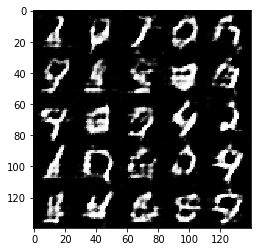

Epoch 1/2... Discriminator Loss: 1.3536... Generator Loss: 0.6657
Epoch 1/2... Discriminator Loss: 1.2232... Generator Loss: 0.9795
Epoch 1/2... Discriminator Loss: 1.0380... Generator Loss: 1.0963
Epoch 1/2... Discriminator Loss: 0.7641... Generator Loss: 1.5172
Epoch 1/2... Discriminator Loss: 0.9484... Generator Loss: 1.8012
Epoch 1/2... Discriminator Loss: 1.3758... Generator Loss: 2.2127
Epoch 1/2... Discriminator Loss: 1.5450... Generator Loss: 2.8124
Epoch 1/2... Discriminator Loss: 2.0651... Generator Loss: 0.2514
Epoch 1/2... Discriminator Loss: 1.2172... Generator Loss: 1.6091
Epoch 1/2... Discriminator Loss: 1.7182... Generator Loss: 0.4219


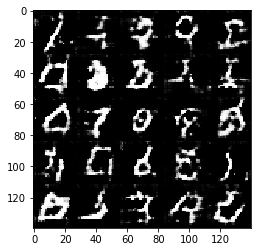

Epoch 1/2... Discriminator Loss: 1.3749... Generator Loss: 0.6147
Epoch 1/2... Discriminator Loss: 1.0152... Generator Loss: 0.9045
Epoch 1/2... Discriminator Loss: 1.1039... Generator Loss: 1.1341
Epoch 1/2... Discriminator Loss: 0.9979... Generator Loss: 1.6057
Epoch 1/2... Discriminator Loss: 1.2463... Generator Loss: 1.0081
Epoch 1/2... Discriminator Loss: 1.2293... Generator Loss: 0.9608
Epoch 1/2... Discriminator Loss: 1.1118... Generator Loss: 1.0217
Epoch 1/2... Discriminator Loss: 1.2255... Generator Loss: 1.0455
Epoch 1/2... Discriminator Loss: 1.1269... Generator Loss: 1.2264
Epoch 1/2... Discriminator Loss: 1.6816... Generator Loss: 2.4939


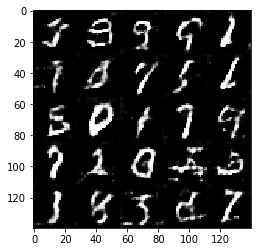

Epoch 1/2... Discriminator Loss: 2.0321... Generator Loss: 0.2573
Epoch 1/2... Discriminator Loss: 1.2324... Generator Loss: 0.8379
Epoch 1/2... Discriminator Loss: 1.2887... Generator Loss: 0.6189
Epoch 1/2... Discriminator Loss: 1.4282... Generator Loss: 1.1442
Epoch 1/2... Discriminator Loss: 1.2626... Generator Loss: 1.6266
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.8096
Epoch 1/2... Discriminator Loss: 1.1764... Generator Loss: 0.8387
Epoch 1/2... Discriminator Loss: 1.0153... Generator Loss: 1.0785
Epoch 1/2... Discriminator Loss: 1.2371... Generator Loss: 0.7611
Epoch 1/2... Discriminator Loss: 1.6740... Generator Loss: 2.2584


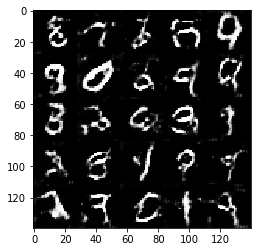

Epoch 1/2... Discriminator Loss: 1.1994... Generator Loss: 1.4047
Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.6992
Epoch 1/2... Discriminator Loss: 1.3211... Generator Loss: 1.3853
Epoch 1/2... Discriminator Loss: 1.1788... Generator Loss: 0.8680
Epoch 1/2... Discriminator Loss: 1.2299... Generator Loss: 1.1519
Epoch 1/2... Discriminator Loss: 1.5646... Generator Loss: 0.5043
Epoch 1/2... Discriminator Loss: 1.2836... Generator Loss: 0.8421
Epoch 1/2... Discriminator Loss: 1.9710... Generator Loss: 2.7467
Epoch 1/2... Discriminator Loss: 1.1590... Generator Loss: 1.3845
Epoch 1/2... Discriminator Loss: 1.9304... Generator Loss: 0.3266


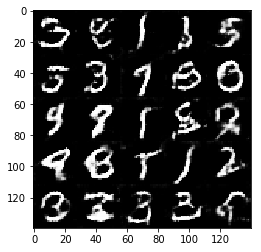

Epoch 1/2... Discriminator Loss: 1.3932... Generator Loss: 0.6608
Epoch 1/2... Discriminator Loss: 1.2911... Generator Loss: 0.7311
Epoch 1/2... Discriminator Loss: 1.1182... Generator Loss: 1.0219
Epoch 1/2... Discriminator Loss: 1.3609... Generator Loss: 0.7306
Epoch 1/2... Discriminator Loss: 1.0377... Generator Loss: 1.4520
Epoch 1/2... Discriminator Loss: 1.4817... Generator Loss: 1.9520
Epoch 1/2... Discriminator Loss: 1.3618... Generator Loss: 0.5874
Epoch 1/2... Discriminator Loss: 1.1933... Generator Loss: 1.5839
Epoch 1/2... Discriminator Loss: 1.2562... Generator Loss: 1.5374
Epoch 1/2... Discriminator Loss: 1.3576... Generator Loss: 0.8138


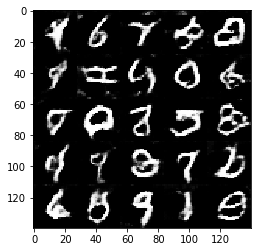

Epoch 1/2... Discriminator Loss: 1.0236... Generator Loss: 1.1021
Epoch 1/2... Discriminator Loss: 1.3590... Generator Loss: 0.6293
Epoch 1/2... Discriminator Loss: 1.7277... Generator Loss: 0.4297
Epoch 2/2... Discriminator Loss: 1.1732... Generator Loss: 1.2288
Epoch 2/2... Discriminator Loss: 1.0297... Generator Loss: 1.1227
Epoch 2/2... Discriminator Loss: 1.4987... Generator Loss: 2.4877
Epoch 2/2... Discriminator Loss: 1.1439... Generator Loss: 1.2189
Epoch 2/2... Discriminator Loss: 1.1055... Generator Loss: 1.0554
Epoch 2/2... Discriminator Loss: 1.1585... Generator Loss: 1.6252
Epoch 2/2... Discriminator Loss: 1.3604... Generator Loss: 0.5581


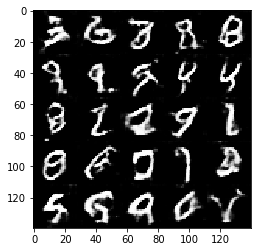

Epoch 2/2... Discriminator Loss: 1.2396... Generator Loss: 1.7350
Epoch 2/2... Discriminator Loss: 1.7374... Generator Loss: 0.3486
Epoch 2/2... Discriminator Loss: 1.4248... Generator Loss: 0.7114
Epoch 2/2... Discriminator Loss: 1.2144... Generator Loss: 0.7140
Epoch 2/2... Discriminator Loss: 1.0747... Generator Loss: 0.9164
Epoch 2/2... Discriminator Loss: 1.4091... Generator Loss: 0.5317
Epoch 2/2... Discriminator Loss: 1.1636... Generator Loss: 0.8544
Epoch 2/2... Discriminator Loss: 2.0839... Generator Loss: 0.2461
Epoch 2/2... Discriminator Loss: 1.2731... Generator Loss: 0.6543
Epoch 2/2... Discriminator Loss: 1.1099... Generator Loss: 0.8814


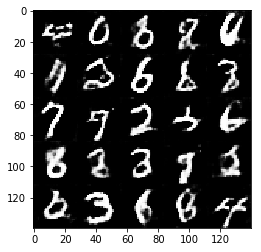

Epoch 2/2... Discriminator Loss: 1.2846... Generator Loss: 1.5795
Epoch 2/2... Discriminator Loss: 0.9826... Generator Loss: 1.3826
Epoch 2/2... Discriminator Loss: 1.1158... Generator Loss: 1.2949
Epoch 2/2... Discriminator Loss: 1.2953... Generator Loss: 1.5589
Epoch 2/2... Discriminator Loss: 1.0436... Generator Loss: 1.0372
Epoch 2/2... Discriminator Loss: 1.3223... Generator Loss: 0.9374
Epoch 2/2... Discriminator Loss: 1.3657... Generator Loss: 1.7337
Epoch 2/2... Discriminator Loss: 1.1228... Generator Loss: 1.2792
Epoch 2/2... Discriminator Loss: 1.1753... Generator Loss: 0.9962
Epoch 2/2... Discriminator Loss: 1.0187... Generator Loss: 1.4739


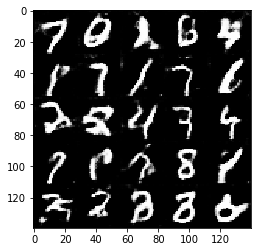

Epoch 2/2... Discriminator Loss: 1.4307... Generator Loss: 2.9097
Epoch 2/2... Discriminator Loss: 1.6807... Generator Loss: 0.7804
Epoch 2/2... Discriminator Loss: 1.2459... Generator Loss: 0.8857
Epoch 2/2... Discriminator Loss: 1.2509... Generator Loss: 1.0539
Epoch 2/2... Discriminator Loss: 1.2616... Generator Loss: 1.0115
Epoch 2/2... Discriminator Loss: 1.2294... Generator Loss: 1.0315
Epoch 2/2... Discriminator Loss: 1.2973... Generator Loss: 1.2239
Epoch 2/2... Discriminator Loss: 1.1422... Generator Loss: 0.8531
Epoch 2/2... Discriminator Loss: 1.3867... Generator Loss: 1.7199
Epoch 2/2... Discriminator Loss: 1.3082... Generator Loss: 1.2478


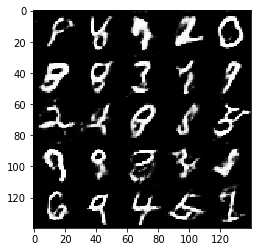

Epoch 2/2... Discriminator Loss: 1.4055... Generator Loss: 0.6281
Epoch 2/2... Discriminator Loss: 1.1895... Generator Loss: 0.7900
Epoch 2/2... Discriminator Loss: 1.2287... Generator Loss: 0.9014
Epoch 2/2... Discriminator Loss: 1.2644... Generator Loss: 0.6858
Epoch 2/2... Discriminator Loss: 0.9846... Generator Loss: 1.1098
Epoch 2/2... Discriminator Loss: 1.9488... Generator Loss: 2.6909
Epoch 2/2... Discriminator Loss: 1.1404... Generator Loss: 0.8032
Epoch 2/2... Discriminator Loss: 1.1095... Generator Loss: 1.4894
Epoch 2/2... Discriminator Loss: 1.2809... Generator Loss: 0.6520
Epoch 2/2... Discriminator Loss: 1.8316... Generator Loss: 2.8229


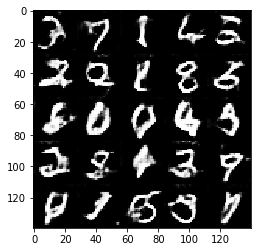

Epoch 2/2... Discriminator Loss: 1.3161... Generator Loss: 0.5683
Epoch 2/2... Discriminator Loss: 1.2598... Generator Loss: 0.6933
Epoch 2/2... Discriminator Loss: 1.0623... Generator Loss: 1.2118
Epoch 2/2... Discriminator Loss: 0.8630... Generator Loss: 1.9181
Epoch 2/2... Discriminator Loss: 1.2527... Generator Loss: 0.7221
Epoch 2/2... Discriminator Loss: 1.3826... Generator Loss: 0.6266
Epoch 2/2... Discriminator Loss: 0.9655... Generator Loss: 1.2616
Epoch 2/2... Discriminator Loss: 1.2351... Generator Loss: 0.6513
Epoch 2/2... Discriminator Loss: 1.3364... Generator Loss: 0.7179
Epoch 2/2... Discriminator Loss: 1.2265... Generator Loss: 0.6932


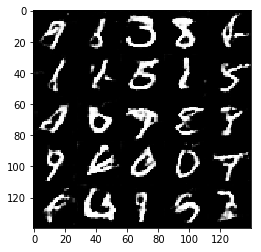

Epoch 2/2... Discriminator Loss: 1.2234... Generator Loss: 1.3812
Epoch 2/2... Discriminator Loss: 0.9801... Generator Loss: 1.4857
Epoch 2/2... Discriminator Loss: 1.0107... Generator Loss: 1.3941
Epoch 2/2... Discriminator Loss: 1.1742... Generator Loss: 0.8042
Epoch 2/2... Discriminator Loss: 1.3175... Generator Loss: 0.6780
Epoch 2/2... Discriminator Loss: 1.2252... Generator Loss: 0.7246
Epoch 2/2... Discriminator Loss: 1.0734... Generator Loss: 1.3822
Epoch 2/2... Discriminator Loss: 4.1461... Generator Loss: 5.2245
Epoch 2/2... Discriminator Loss: 1.1446... Generator Loss: 0.9950
Epoch 2/2... Discriminator Loss: 1.1800... Generator Loss: 0.9222


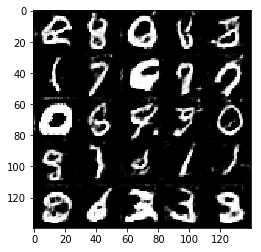

Epoch 2/2... Discriminator Loss: 1.1920... Generator Loss: 0.8256
Epoch 2/2... Discriminator Loss: 1.0565... Generator Loss: 1.1820
Epoch 2/2... Discriminator Loss: 1.1477... Generator Loss: 1.0730
Epoch 2/2... Discriminator Loss: 1.4585... Generator Loss: 0.5102
Epoch 2/2... Discriminator Loss: 1.8667... Generator Loss: 3.1024
Epoch 2/2... Discriminator Loss: 1.2497... Generator Loss: 0.7056
Epoch 2/2... Discriminator Loss: 1.2339... Generator Loss: 1.5843
Epoch 2/2... Discriminator Loss: 1.1334... Generator Loss: 0.8004
Epoch 2/2... Discriminator Loss: 1.2394... Generator Loss: 0.9646
Epoch 2/2... Discriminator Loss: 1.3200... Generator Loss: 0.5807


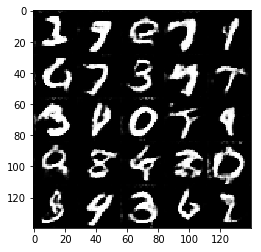

Epoch 2/2... Discriminator Loss: 1.2008... Generator Loss: 0.7919
Epoch 2/2... Discriminator Loss: 1.0879... Generator Loss: 1.0192
Epoch 2/2... Discriminator Loss: 0.9986... Generator Loss: 1.1300
Epoch 2/2... Discriminator Loss: 1.4204... Generator Loss: 1.0609
Epoch 2/2... Discriminator Loss: 1.3029... Generator Loss: 2.3759
Epoch 2/2... Discriminator Loss: 1.3666... Generator Loss: 0.5517
Epoch 2/2... Discriminator Loss: 1.1986... Generator Loss: 2.0961
Epoch 2/2... Discriminator Loss: 1.1403... Generator Loss: 0.7736
Epoch 2/2... Discriminator Loss: 1.6432... Generator Loss: 2.3765
Epoch 2/2... Discriminator Loss: 1.1953... Generator Loss: 1.4415


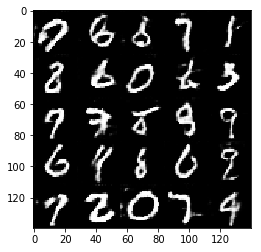

Epoch 2/2... Discriminator Loss: 1.0465... Generator Loss: 0.9016
Epoch 2/2... Discriminator Loss: 1.0704... Generator Loss: 1.5894
Epoch 2/2... Discriminator Loss: 1.6457... Generator Loss: 0.4158
Epoch 2/2... Discriminator Loss: 0.7466... Generator Loss: 1.6947
Epoch 2/2... Discriminator Loss: 1.2233... Generator Loss: 1.6895
Epoch 2/2... Discriminator Loss: 0.9912... Generator Loss: 1.7018
Epoch 2/2... Discriminator Loss: 1.6336... Generator Loss: 3.5759


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.01
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.8787... Generator Loss: 1.0792
Epoch 1/1... Discriminator Loss: 0.6515... Generator Loss: 1.6522
Epoch 1/1... Discriminator Loss: 0.5848... Generator Loss: 1.8484
Epoch 1/1... Discriminator Loss: 0.4814... Generator Loss: 2.5501
Epoch 1/1... Discriminator Loss: 0.4302... Generator Loss: 2.8761
Epoch 1/1... Discriminator Loss: 0.4591... Generator Loss: 3.3346
Epoch 1/1... Discriminator Loss: 0.6858... Generator Loss: 1.4537
Epoch 1/1... Discriminator Loss: 0.6729... Generator Loss: 1.8876
Epoch 1/1... Discriminator Loss: 0.7731... Generator Loss: 3.7370
Epoch 1/1... Discriminator Loss: 0.6019... Generator Loss: 2.4533


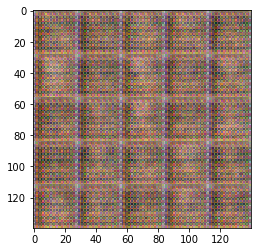

Epoch 1/1... Discriminator Loss: 2.2225... Generator Loss: 6.1645
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 2.8475
Epoch 1/1... Discriminator Loss: 1.0139... Generator Loss: 2.8758
Epoch 1/1... Discriminator Loss: 0.6472... Generator Loss: 1.8737
Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 4.5614
Epoch 1/1... Discriminator Loss: 0.8240... Generator Loss: 1.2952
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 1.2513
Epoch 1/1... Discriminator Loss: 0.6496... Generator Loss: 1.7428
Epoch 1/1... Discriminator Loss: 0.7915... Generator Loss: 2.7129
Epoch 1/1... Discriminator Loss: 0.6243... Generator Loss: 2.3020


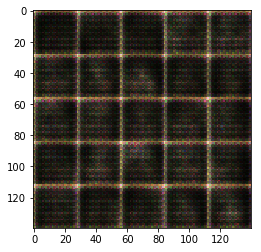

Epoch 1/1... Discriminator Loss: 0.8720... Generator Loss: 1.0204
Epoch 1/1... Discriminator Loss: 0.6309... Generator Loss: 2.2150
Epoch 1/1... Discriminator Loss: 0.6053... Generator Loss: 1.8912
Epoch 1/1... Discriminator Loss: 0.6710... Generator Loss: 2.7532
Epoch 1/1... Discriminator Loss: 0.6517... Generator Loss: 2.5988
Epoch 1/1... Discriminator Loss: 0.6763... Generator Loss: 1.8006
Epoch 1/1... Discriminator Loss: 0.6948... Generator Loss: 1.5756
Epoch 1/1... Discriminator Loss: 0.5624... Generator Loss: 2.5212
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.3759
Epoch 1/1... Discriminator Loss: 0.6590... Generator Loss: 2.1409


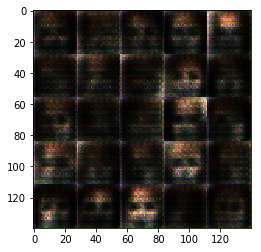

Epoch 1/1... Discriminator Loss: 0.8580... Generator Loss: 1.0823
Epoch 1/1... Discriminator Loss: 0.5337... Generator Loss: 2.7007
Epoch 1/1... Discriminator Loss: 0.8925... Generator Loss: 1.1075
Epoch 1/1... Discriminator Loss: 0.6724... Generator Loss: 2.0596
Epoch 1/1... Discriminator Loss: 1.0138... Generator Loss: 4.0879
Epoch 1/1... Discriminator Loss: 0.6007... Generator Loss: 2.5147
Epoch 1/1... Discriminator Loss: 0.6588... Generator Loss: 1.9630
Epoch 1/1... Discriminator Loss: 0.7299... Generator Loss: 1.6345
Epoch 1/1... Discriminator Loss: 0.6525... Generator Loss: 2.6975
Epoch 1/1... Discriminator Loss: 0.7375... Generator Loss: 1.4074


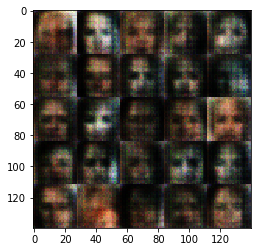

Epoch 1/1... Discriminator Loss: 0.9580... Generator Loss: 2.0174
Epoch 1/1... Discriminator Loss: 0.6586... Generator Loss: 2.1116
Epoch 1/1... Discriminator Loss: 0.8499... Generator Loss: 1.5633
Epoch 1/1... Discriminator Loss: 0.7438... Generator Loss: 1.8125
Epoch 1/1... Discriminator Loss: 0.7842... Generator Loss: 3.1695
Epoch 1/1... Discriminator Loss: 0.7261... Generator Loss: 2.4568
Epoch 1/1... Discriminator Loss: 0.7032... Generator Loss: 2.0449
Epoch 1/1... Discriminator Loss: 0.7718... Generator Loss: 1.4390
Epoch 1/1... Discriminator Loss: 0.7609... Generator Loss: 1.3752
Epoch 1/1... Discriminator Loss: 1.1129... Generator Loss: 0.7655


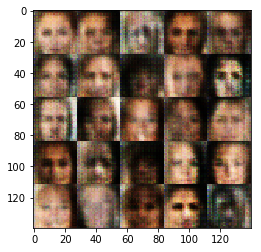

Epoch 1/1... Discriminator Loss: 0.8441... Generator Loss: 1.7608
Epoch 1/1... Discriminator Loss: 0.7867... Generator Loss: 1.7889
Epoch 1/1... Discriminator Loss: 0.7466... Generator Loss: 1.8613
Epoch 1/1... Discriminator Loss: 0.8349... Generator Loss: 2.3788
Epoch 1/1... Discriminator Loss: 0.9575... Generator Loss: 1.5668
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 1.1783
Epoch 1/1... Discriminator Loss: 0.7676... Generator Loss: 1.3021
Epoch 1/1... Discriminator Loss: 0.8487... Generator Loss: 1.6585
Epoch 1/1... Discriminator Loss: 0.8739... Generator Loss: 1.6809
Epoch 1/1... Discriminator Loss: 0.7824... Generator Loss: 1.4170


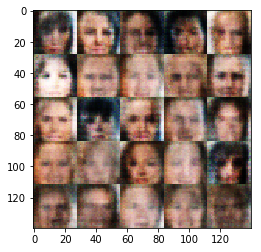

Epoch 1/1... Discriminator Loss: 0.9010... Generator Loss: 1.1016
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 0.8338
Epoch 1/1... Discriminator Loss: 0.8351... Generator Loss: 1.6458
Epoch 1/1... Discriminator Loss: 0.7561... Generator Loss: 1.9171
Epoch 1/1... Discriminator Loss: 0.9597... Generator Loss: 0.9228
Epoch 1/1... Discriminator Loss: 0.9575... Generator Loss: 1.2979
Epoch 1/1... Discriminator Loss: 1.2211... Generator Loss: 2.6030
Epoch 1/1... Discriminator Loss: 1.1633... Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 0.8736... Generator Loss: 1.0717
Epoch 1/1... Discriminator Loss: 0.8428... Generator Loss: 1.1893


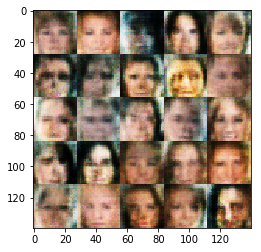

Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 0.5789
Epoch 1/1... Discriminator Loss: 0.9187... Generator Loss: 1.8457
Epoch 1/1... Discriminator Loss: 0.9304... Generator Loss: 0.9866
Epoch 1/1... Discriminator Loss: 0.9564... Generator Loss: 1.6773
Epoch 1/1... Discriminator Loss: 0.9014... Generator Loss: 1.1901
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 1.9288
Epoch 1/1... Discriminator Loss: 0.8523... Generator Loss: 1.5563
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 0.6047
Epoch 1/1... Discriminator Loss: 0.9646... Generator Loss: 2.2737


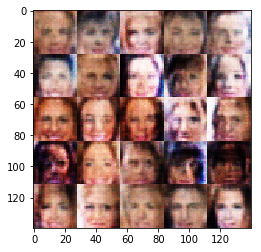

Epoch 1/1... Discriminator Loss: 0.9077... Generator Loss: 0.9486
Epoch 1/1... Discriminator Loss: 0.9065... Generator Loss: 1.9345
Epoch 1/1... Discriminator Loss: 0.8066... Generator Loss: 2.2351
Epoch 1/1... Discriminator Loss: 1.9281... Generator Loss: 0.3117
Epoch 1/1... Discriminator Loss: 0.8072... Generator Loss: 1.5368
Epoch 1/1... Discriminator Loss: 0.8173... Generator Loss: 1.4993
Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 2.8070
Epoch 1/1... Discriminator Loss: 0.7703... Generator Loss: 1.5473
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 1.8298
Epoch 1/1... Discriminator Loss: 0.9391... Generator Loss: 2.3929


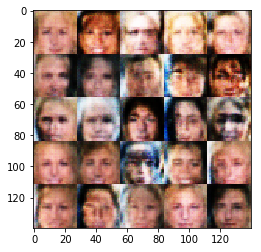

Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 0.8818... Generator Loss: 1.2572
Epoch 1/1... Discriminator Loss: 0.8532... Generator Loss: 1.2135
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.5860
Epoch 1/1... Discriminator Loss: 0.8255... Generator Loss: 1.4990
Epoch 1/1... Discriminator Loss: 0.8847... Generator Loss: 1.4075
Epoch 1/1... Discriminator Loss: 0.9516... Generator Loss: 2.1332
Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 0.7444... Generator Loss: 1.4233
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 1.5400


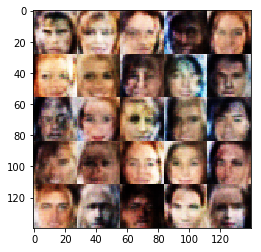

Epoch 1/1... Discriminator Loss: 1.0013... Generator Loss: 0.8757
Epoch 1/1... Discriminator Loss: 0.9885... Generator Loss: 0.9196
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.6140
Epoch 1/1... Discriminator Loss: 0.8569... Generator Loss: 1.2168
Epoch 1/1... Discriminator Loss: 0.7410... Generator Loss: 1.5808
Epoch 1/1... Discriminator Loss: 0.7400... Generator Loss: 1.5207
Epoch 1/1... Discriminator Loss: 0.6415... Generator Loss: 2.0894
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 0.9120
Epoch 1/1... Discriminator Loss: 0.6678... Generator Loss: 1.6417


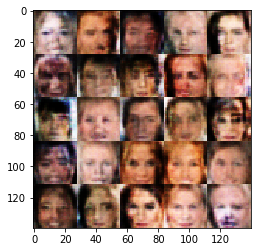

Epoch 1/1... Discriminator Loss: 0.6679... Generator Loss: 2.5287
Epoch 1/1... Discriminator Loss: 0.7048... Generator Loss: 2.3965
Epoch 1/1... Discriminator Loss: 0.5964... Generator Loss: 2.2425
Epoch 1/1... Discriminator Loss: 0.5970... Generator Loss: 1.8980
Epoch 1/1... Discriminator Loss: 0.6509... Generator Loss: 1.4668
Epoch 1/1... Discriminator Loss: 0.9527... Generator Loss: 0.8971
Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 1.5449
Epoch 1/1... Discriminator Loss: 0.5885... Generator Loss: 2.8430
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 3.6390
Epoch 1/1... Discriminator Loss: 0.7458... Generator Loss: 1.2696


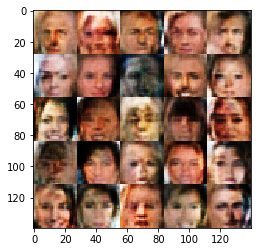

Epoch 1/1... Discriminator Loss: 0.6128... Generator Loss: 1.7969
Epoch 1/1... Discriminator Loss: 0.4856... Generator Loss: 2.4538
Epoch 1/1... Discriminator Loss: 0.6327... Generator Loss: 2.0713
Epoch 1/1... Discriminator Loss: 0.5308... Generator Loss: 2.0293
Epoch 1/1... Discriminator Loss: 0.4722... Generator Loss: 2.7796
Epoch 1/1... Discriminator Loss: 0.4967... Generator Loss: 3.3751
Epoch 1/1... Discriminator Loss: 0.6040... Generator Loss: 3.2750
Epoch 1/1... Discriminator Loss: 0.5067... Generator Loss: 2.2908
Epoch 1/1... Discriminator Loss: 0.6187... Generator Loss: 1.6460
Epoch 1/1... Discriminator Loss: 0.5129... Generator Loss: 2.1190


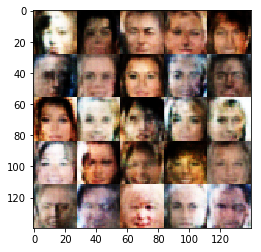

Epoch 1/1... Discriminator Loss: 0.6386... Generator Loss: 1.5554
Epoch 1/1... Discriminator Loss: 0.6463... Generator Loss: 1.6001
Epoch 1/1... Discriminator Loss: 0.4307... Generator Loss: 3.1267
Epoch 1/1... Discriminator Loss: 0.8036... Generator Loss: 1.1950
Epoch 1/1... Discriminator Loss: 0.6308... Generator Loss: 2.3768
Epoch 1/1... Discriminator Loss: 0.5272... Generator Loss: 3.3924
Epoch 1/1... Discriminator Loss: 0.6002... Generator Loss: 2.5533
Epoch 1/1... Discriminator Loss: 0.7960... Generator Loss: 1.2083
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 0.8361
Epoch 1/1... Discriminator Loss: 0.6193... Generator Loss: 1.7464


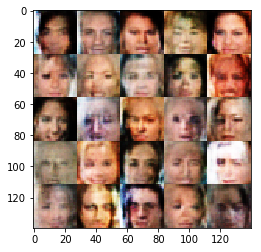

Epoch 1/1... Discriminator Loss: 0.4300... Generator Loss: 3.0412
Epoch 1/1... Discriminator Loss: 1.3130... Generator Loss: 0.5874
Epoch 1/1... Discriminator Loss: 0.5588... Generator Loss: 3.2544
Epoch 1/1... Discriminator Loss: 0.7738... Generator Loss: 1.1788
Epoch 1/1... Discriminator Loss: 0.6182... Generator Loss: 3.1150
Epoch 1/1... Discriminator Loss: 0.4409... Generator Loss: 3.3894
Epoch 1/1... Discriminator Loss: 0.6116... Generator Loss: 1.9962
Epoch 1/1... Discriminator Loss: 0.5747... Generator Loss: 2.3543
Epoch 1/1... Discriminator Loss: 0.7772... Generator Loss: 1.1989
Epoch 1/1... Discriminator Loss: 0.6396... Generator Loss: 1.5832


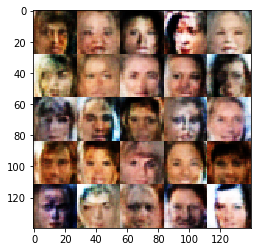

Epoch 1/1... Discriminator Loss: 0.6201... Generator Loss: 1.9522
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 0.7408... Generator Loss: 1.3379
Epoch 1/1... Discriminator Loss: 0.7631... Generator Loss: 1.2988
Epoch 1/1... Discriminator Loss: 0.7121... Generator Loss: 1.3780
Epoch 1/1... Discriminator Loss: 1.1910... Generator Loss: 2.7381
Epoch 1/1... Discriminator Loss: 1.7768... Generator Loss: 0.3384
Epoch 1/1... Discriminator Loss: 0.8753... Generator Loss: 1.4618
Epoch 1/1... Discriminator Loss: 0.8099... Generator Loss: 1.4531
Epoch 1/1... Discriminator Loss: 0.7744... Generator Loss: 1.6010


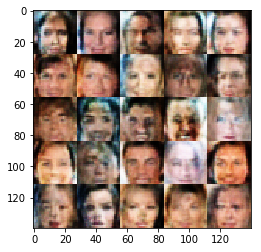

Epoch 1/1... Discriminator Loss: 0.8838... Generator Loss: 1.0527
Epoch 1/1... Discriminator Loss: 0.6998... Generator Loss: 1.8133
Epoch 1/1... Discriminator Loss: 0.7834... Generator Loss: 2.6622
Epoch 1/1... Discriminator Loss: 0.8124... Generator Loss: 1.1756
Epoch 1/1... Discriminator Loss: 1.2571... Generator Loss: 0.5839
Epoch 1/1... Discriminator Loss: 1.0009... Generator Loss: 1.9501
Epoch 1/1... Discriminator Loss: 0.5368... Generator Loss: 2.2333
Epoch 1/1... Discriminator Loss: 0.8661... Generator Loss: 1.0498
Epoch 1/1... Discriminator Loss: 0.6326... Generator Loss: 1.6264
Epoch 1/1... Discriminator Loss: 0.9761... Generator Loss: 0.8424


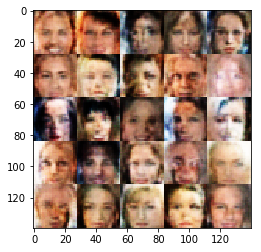

Epoch 1/1... Discriminator Loss: 0.8517... Generator Loss: 1.0728
Epoch 1/1... Discriminator Loss: 0.6215... Generator Loss: 2.0851
Epoch 1/1... Discriminator Loss: 0.5291... Generator Loss: 2.4701
Epoch 1/1... Discriminator Loss: 2.7176... Generator Loss: 5.2199
Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 2.2189
Epoch 1/1... Discriminator Loss: 1.1735... Generator Loss: 0.6947
Epoch 1/1... Discriminator Loss: 0.8017... Generator Loss: 1.2354
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 1.8053
Epoch 1/1... Discriminator Loss: 0.5696... Generator Loss: 2.0716
Epoch 1/1... Discriminator Loss: 0.5730... Generator Loss: 2.4326


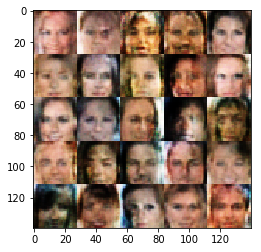

Epoch 1/1... Discriminator Loss: 0.5342... Generator Loss: 1.9708
Epoch 1/1... Discriminator Loss: 0.4497... Generator Loss: 2.9782
Epoch 1/1... Discriminator Loss: 0.6902... Generator Loss: 1.5776
Epoch 1/1... Discriminator Loss: 0.4476... Generator Loss: 2.7317
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 2.2899
Epoch 1/1... Discriminator Loss: 0.5425... Generator Loss: 2.2064
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.5521
Epoch 1/1... Discriminator Loss: 0.8470... Generator Loss: 1.2447
Epoch 1/1... Discriminator Loss: 0.6391... Generator Loss: 2.8639
Epoch 1/1... Discriminator Loss: 0.4518... Generator Loss: 3.0160


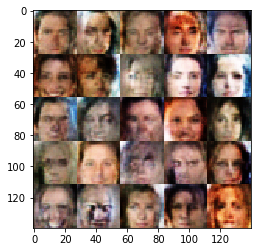

Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 1.7329
Epoch 1/1... Discriminator Loss: 0.5446... Generator Loss: 1.9452
Epoch 1/1... Discriminator Loss: 0.5258... Generator Loss: 3.0132
Epoch 1/1... Discriminator Loss: 0.5214... Generator Loss: 2.3257
Epoch 1/1... Discriminator Loss: 0.4583... Generator Loss: 2.8085
Epoch 1/1... Discriminator Loss: 0.4450... Generator Loss: 2.9628
Epoch 1/1... Discriminator Loss: 0.4678... Generator Loss: 2.7160
Epoch 1/1... Discriminator Loss: 0.4096... Generator Loss: 3.1228
Epoch 1/1... Discriminator Loss: 0.5014... Generator Loss: 2.1289
Epoch 1/1... Discriminator Loss: 0.6871... Generator Loss: 1.3918


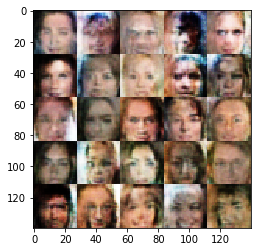

Epoch 1/1... Discriminator Loss: 0.4846... Generator Loss: 3.3526
Epoch 1/1... Discriminator Loss: 0.5779... Generator Loss: 1.7435
Epoch 1/1... Discriminator Loss: 0.3689... Generator Loss: 4.5268
Epoch 1/1... Discriminator Loss: 0.7629... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 0.4192... Generator Loss: 3.4625
Epoch 1/1... Discriminator Loss: 0.5978... Generator Loss: 4.5884
Epoch 1/1... Discriminator Loss: 0.4720... Generator Loss: 2.5493
Epoch 1/1... Discriminator Loss: 1.8857... Generator Loss: 0.3666
Epoch 1/1... Discriminator Loss: 2.3189... Generator Loss: 0.2085
Epoch 1/1... Discriminator Loss: 0.5866... Generator Loss: 2.8429


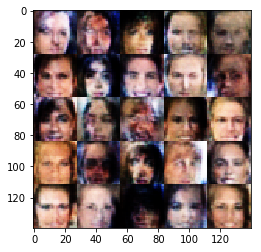

Epoch 1/1... Discriminator Loss: 0.5405... Generator Loss: 2.1048
Epoch 1/1... Discriminator Loss: 0.6886... Generator Loss: 1.5659
Epoch 1/1... Discriminator Loss: 0.5097... Generator Loss: 4.2350
Epoch 1/1... Discriminator Loss: 0.4669... Generator Loss: 2.8588
Epoch 1/1... Discriminator Loss: 0.5848... Generator Loss: 1.7013
Epoch 1/1... Discriminator Loss: 0.4151... Generator Loss: 3.5282
Epoch 1/1... Discriminator Loss: 0.4441... Generator Loss: 2.5692
Epoch 1/1... Discriminator Loss: 0.4869... Generator Loss: 2.2209
Epoch 1/1... Discriminator Loss: 0.5704... Generator Loss: 4.2467
Epoch 1/1... Discriminator Loss: 0.4269... Generator Loss: 2.7498


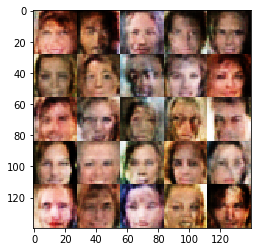

Epoch 1/1... Discriminator Loss: 0.4628... Generator Loss: 2.4992
Epoch 1/1... Discriminator Loss: 0.5190... Generator Loss: 2.1904
Epoch 1/1... Discriminator Loss: 0.4509... Generator Loss: 4.3153
Epoch 1/1... Discriminator Loss: 0.4239... Generator Loss: 2.7216
Epoch 1/1... Discriminator Loss: 0.4271... Generator Loss: 2.7259
Epoch 1/1... Discriminator Loss: 0.3902... Generator Loss: 4.0709
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 2.5823
Epoch 1/1... Discriminator Loss: 0.4963... Generator Loss: 4.0941
Epoch 1/1... Discriminator Loss: 0.6894... Generator Loss: 1.8773
Epoch 1/1... Discriminator Loss: 0.4565... Generator Loss: 2.5743


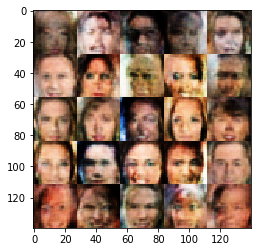

Epoch 1/1... Discriminator Loss: 0.4740... Generator Loss: 2.3872
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 2.9065
Epoch 1/1... Discriminator Loss: 0.4951... Generator Loss: 2.1821
Epoch 1/1... Discriminator Loss: 0.3793... Generator Loss: 3.9282
Epoch 1/1... Discriminator Loss: 0.4071... Generator Loss: 3.7939
Epoch 1/1... Discriminator Loss: 0.3867... Generator Loss: 3.8929
Epoch 1/1... Discriminator Loss: 0.4672... Generator Loss: 2.8917
Epoch 1/1... Discriminator Loss: 0.3702... Generator Loss: 3.9683
Epoch 1/1... Discriminator Loss: 0.3736... Generator Loss: 4.9178
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 3.4704


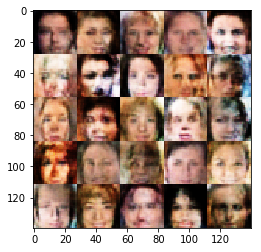

Epoch 1/1... Discriminator Loss: 0.4894... Generator Loss: 3.7461
Epoch 1/1... Discriminator Loss: 0.3690... Generator Loss: 4.3970
Epoch 1/1... Discriminator Loss: 3.5171... Generator Loss: 5.0348
Epoch 1/1... Discriminator Loss: 0.8679... Generator Loss: 1.0807
Epoch 1/1... Discriminator Loss: 0.6065... Generator Loss: 2.4598
Epoch 1/1... Discriminator Loss: 0.6450... Generator Loss: 1.5256
Epoch 1/1... Discriminator Loss: 0.4134... Generator Loss: 2.9338
Epoch 1/1... Discriminator Loss: 0.4654... Generator Loss: 2.3276
Epoch 1/1... Discriminator Loss: 0.4558... Generator Loss: 2.5364
Epoch 1/1... Discriminator Loss: 0.4837... Generator Loss: 2.4690


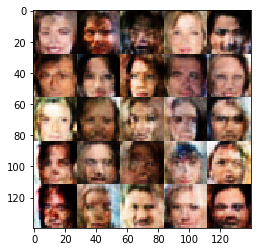

Epoch 1/1... Discriminator Loss: 0.4421... Generator Loss: 3.0895
Epoch 1/1... Discriminator Loss: 0.4195... Generator Loss: 2.9372
Epoch 1/1... Discriminator Loss: 0.4159... Generator Loss: 3.0144
Epoch 1/1... Discriminator Loss: 0.4170... Generator Loss: 3.0780
Epoch 1/1... Discriminator Loss: 0.3956... Generator Loss: 3.3662
Epoch 1/1... Discriminator Loss: 0.3810... Generator Loss: 3.7759
Epoch 1/1... Discriminator Loss: 0.4009... Generator Loss: 4.8769
Epoch 1/1... Discriminator Loss: 0.4734... Generator Loss: 3.0927
Epoch 1/1... Discriminator Loss: 0.3992... Generator Loss: 3.4767
Epoch 1/1... Discriminator Loss: 0.3607... Generator Loss: 4.4044


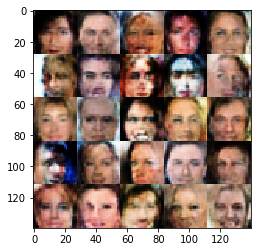

Epoch 1/1... Discriminator Loss: 0.3813... Generator Loss: 5.1728
Epoch 1/1... Discriminator Loss: 0.4084... Generator Loss: 4.4855
Epoch 1/1... Discriminator Loss: 0.4590... Generator Loss: 2.3816
Epoch 1/1... Discriminator Loss: 1.5613... Generator Loss: 0.4565
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 0.5273... Generator Loss: 2.2885
Epoch 1/1... Discriminator Loss: 0.5063... Generator Loss: 2.5725
Epoch 1/1... Discriminator Loss: 0.4923... Generator Loss: 2.6242
Epoch 1/1... Discriminator Loss: 0.5404... Generator Loss: 1.9351
Epoch 1/1... Discriminator Loss: 0.4083... Generator Loss: 3.6351


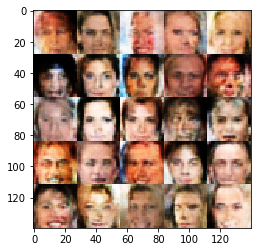

Epoch 1/1... Discriminator Loss: 0.3987... Generator Loss: 3.7953
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 3.2386
Epoch 1/1... Discriminator Loss: 0.9761... Generator Loss: 0.9022


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.